In [2]:
# import modules
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import netCDF4 as nc4
from datetime import datetime
from scipy.io import netcdf
from netCDF4 import Dataset
import cmocean
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

In [3]:
file36 = '/mnt/alberta/equipes/IGE/meom/workdir/albert/GS36.L75/GS36.L75-I/GS36_bathy_from_eNATL36_v2.3.nc'

f36= Dataset(file36, "r", format="NETCDF4")

bathy36=f36.variables['Bathymetry']
navlon36=f36.variables['nav_lon']
navlat36=f36.variables['nav_lat']



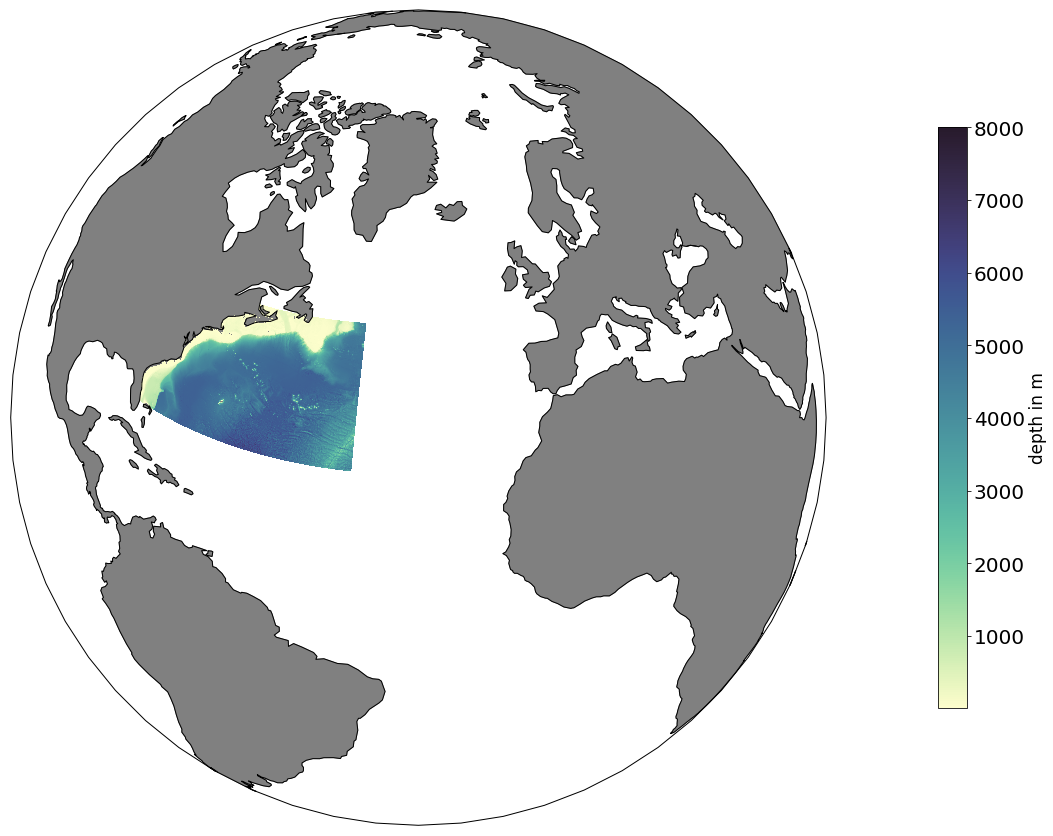

In [4]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
cmap=cmocean.cm.deep
cmap.set_under(color='grey')

pcolor=ax.pcolormesh(navlon36,navlat36,bathy36,transform=ccrs.PlateCarree(),cmap=cmap,vmin=15,vmax=8000)
ax.set_global()
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1)
cbar.set_label("depth in m",size=17)
cbar.ax.tick_params(labelsize=20)
#plt.suptitle("NACHOS12 Bathymetry",y=0.95,fontsize=25)
plt.savefig("bathy_gs36_ortho.png")


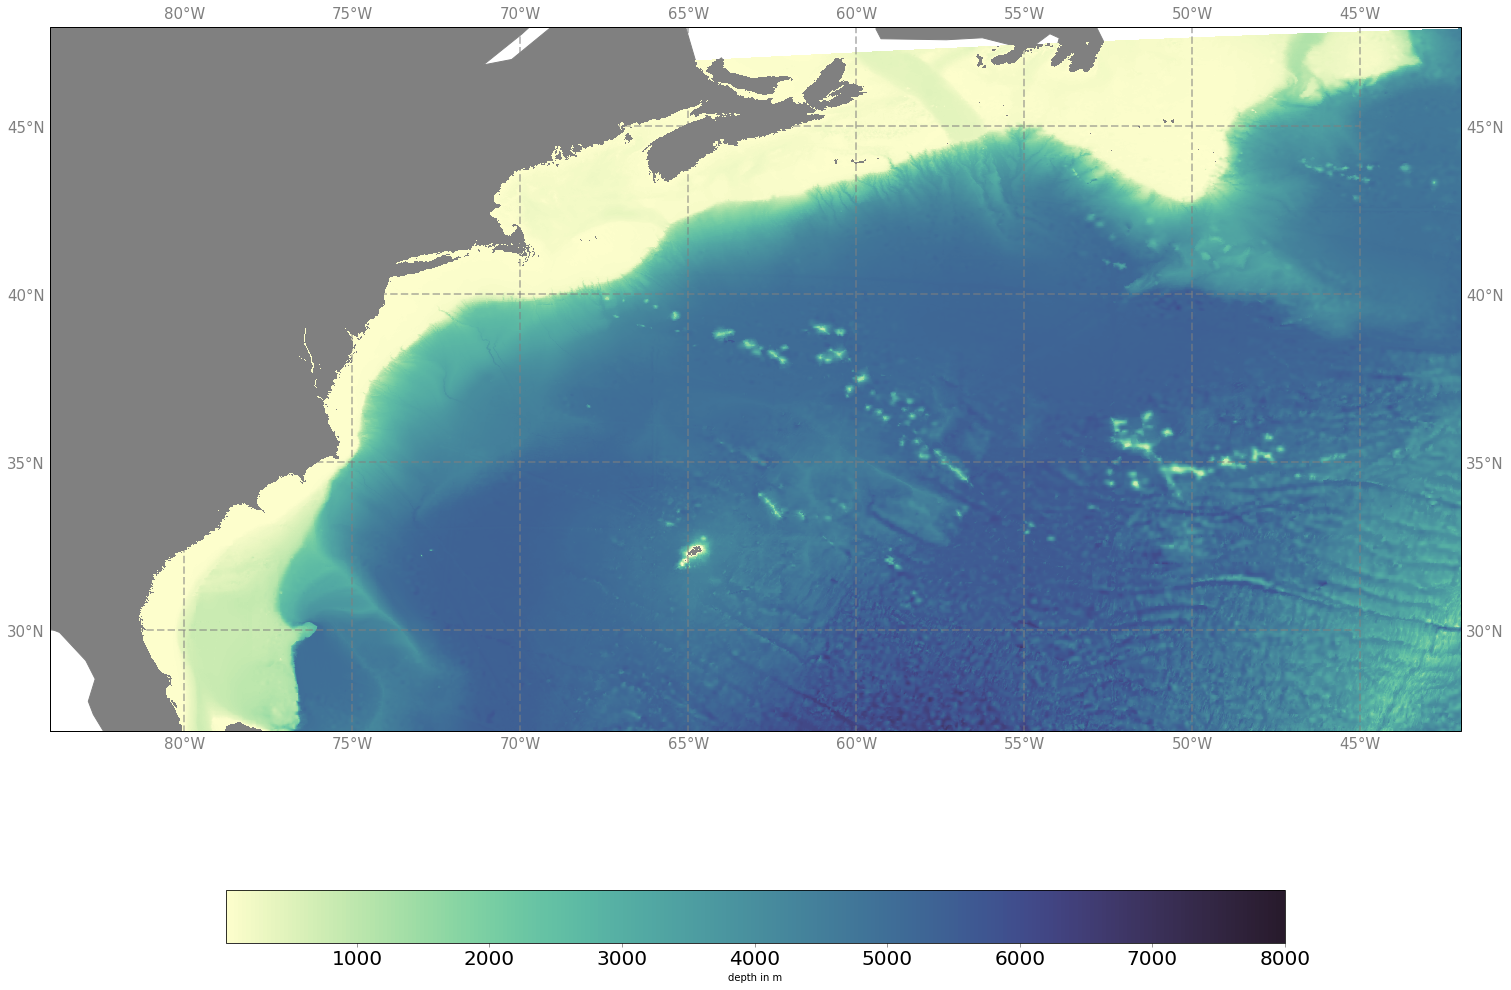

In [15]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
ax1.set_extent([-84, -42, 27, 46])
cmap=cmocean.cm.deep
cmap.set_under(color='grey')
pcolor=ax1.pcolormesh(navlon36,navlat36,np.nan_to_num(bathy36),transform=ccrs.PlateCarree(),cmap=cmap,vmin=15,vmax=8000)
ax1.add_feature(cfeature.LAND,facecolor='grey')
#ax1.coastlines()
gl=ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-95,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45])        
gl.ylocator = mticker.FixedLocator([20,25,30,35,40,45,50,55])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}


fig.subplots_adjust(right=0.8)
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='depth in m')
cbar.ax.tick_params(labelsize=20,color='gray')
ax.set_title('depth in m',size=20,color='gray')
fig.tight_layout()

plt.savefig('gs36.png', dpi=300, bbox_inches='tight')
